# Binomial Options Pricing (CRR Model)

**Author:** Rasheed Cunningham  
**Focus:** European vs American options, convergence, and Greeks (Delta/Gamma)

This notebook demonstrates:
- CRR binomial pricing for European calls/puts
- American early exercise (example: American put)
- Convergence as tree steps increase
- Approximate Delta & Gamma via finite differences


In [10]:
# Download my Gthub project into Colab

!git clone https://github.com/RCP-254400/quant-portfolio

%cd quant-portfolio

!ls

Cloning into 'quant-portfolio'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 37 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 14.31 KiB | 14.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/quant-portfolio
notebooks  README.md  src


In [11]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent
sys.path.append(str(ROOT))

from src.pricing.binomial import binomial_option_price, delta_gamma

print('Imported binomial model ✅')

Imported binomial model ✅


## 1) Price a European Call and an American Put
Parameters:
- $S_0$ spot price
- $K$ strike
- $r$ risk-free rate (cont.)
- $\sigma$ volatility
- $T$ maturity (years)
- $N$ binomial steps


In [12]:
S0 = 100
K = 100
r = 0.05
sigma = 0.20
T = 1.0
N = 100

euro_call = binomial_option_price(S0, K, r, sigma, T, N, option_type='call', american=False)
amer_put  = binomial_option_price(S0, K, r, sigma, T, N, option_type='put',  american=True)

euro_call, amer_put

(10.430611662249113, 6.082354409142444)

## 2) Convergence Check
As $N$ increases, the binomial price typically stabilizes.

In [13]:
steps = [5, 10, 25, 50, 100, 200, 400]
prices = []
for n in steps:
    prices.append(binomial_option_price(S0, K, r, sigma, T, n, option_type='call', american=False))

list(zip(steps, [round(p, 6) for p in prices]))

[(5, 10.805934),
 (10, 10.253409),
 (25, 10.520966),
 (50, 10.410692),
 (100, 10.430612),
 (200, 10.440591),
 (400, 10.445586)]

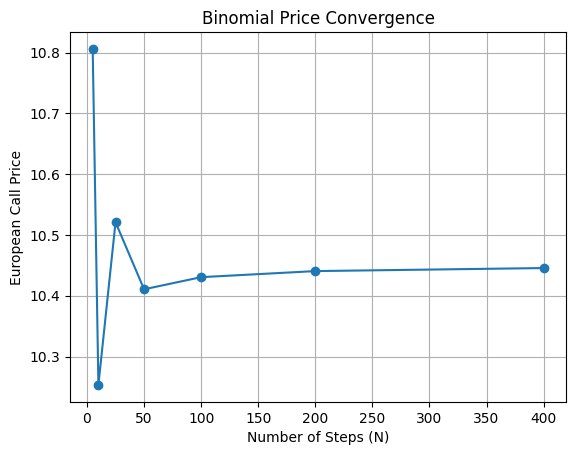

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(steps, prices, marker='o')
plt.xlabel('Number of Steps (N)')
plt.ylabel('European Call Price')
plt.title('Binomial Price Convergence')
plt.grid(True)
plt.show()

## 3) Greeks (Delta & Gamma)
We approximate Delta and Gamma via finite differences using the pricer.

In [15]:
d, g = delta_gamma(S0, K, r, sigma, T, N, option_type='call')
d, g

(0.6365119623646303, 0.0748600395118455)

In [17]:
%cd /content/quant-portfolio/
!git status

/content/quant-portfolio
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	src/pricing/__pycache__/

nothing added to commit but untracked files present (use "git add" to track)


## Notes
- American calls on non-dividend stocks are typically not exercised early.
- American puts can have meaningful early exercise value.
- Next upgrade: add Theta/Vega, and compare against Black–Scholes for European options.
